
# Project: Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### <a id='intro'></a>
## Introduction

### Dataset Description 
In this dataset, we have information about various movies, incuding details lik budget, revenue, cast, director, genres, and more. The dataset consists of 10,866 entries and 21 columns. Key columns include 'popularity', 'budget', 'revenue', 'runtime', 'vote_average, and 'release_year'.

### Question(s) for Analysis
1. Which genres are most popular from year to year?
2. Are movies released in certain years ("release_year") generally more popular or more profitable?
3. Investigate the correlation between a movie's vote average and its revenue (With inflation). Do movies with higher ratings tend to earn more, or are there other factors at play?
4. Is there a correlation between a movie's budget and its revenue (With inflation)?
5. Is there any particular actor or actress who consistently attracts high popularity or receives a great vote average?

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Update The Libraries

In [2]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


In [3]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [4]:
!pip install ipykernel

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [5]:
# Load the data
df = pd.read_csv('tmdb-movies.csv')
# Display the first few rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Explore Data

In [6]:
# Check the shape of the dataset
df.shape # 21 columns 10866 row

(10866, 21)

In [7]:
# Display summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

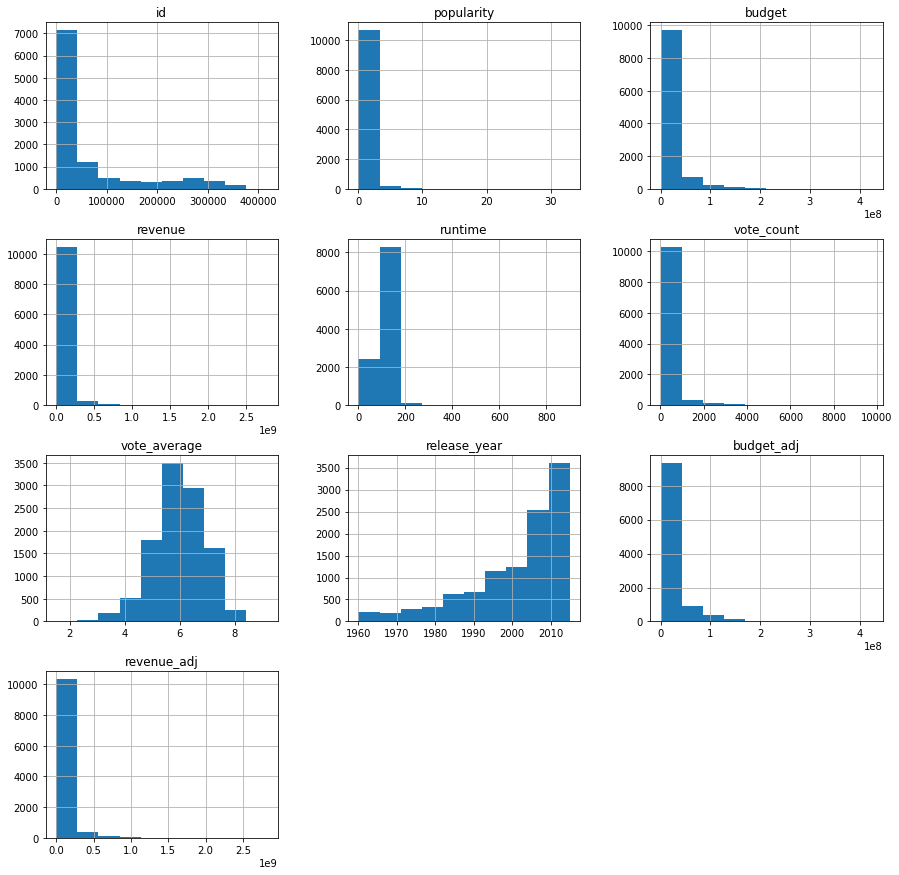

In [11]:
df.hist(figsize=(15,15));

---

### Data Cleaning

**1- Drop unnecessary columns**

**2- Missing values and duplicates**

**3- Correct the data types**

**4- Check for outliers**

**5- Split genres**

- I have 1 duplicated value
- I have 4 columns has missing values
- I will drop missing values 
- I will drop column from the column that has a missing values

**- Drop unnecessary columns**

In [12]:
df.drop(['homepage','tagline','overview','id','imdb_id','keywords','production_companies'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


**- Missing values and duplicates**

In [13]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [14]:
# check for duplicates
df.duplicated().sum()

1

In [15]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [16]:
# drop missing values
def drop_missing_values(df):
    return df.dropna()

clean_df = drop_missing_values(df)

In [17]:
# check for missing values
clean_df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [18]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10731 non-null  float64
 1   budget          10731 non-null  int64  
 2   revenue         10731 non-null  int64  
 3   original_title  10731 non-null  object 
 4   cast            10731 non-null  object 
 5   director        10731 non-null  object 
 6   runtime         10731 non-null  int64  
 7   genres          10731 non-null  object 
 8   release_date    10731 non-null  object 
 9   vote_count      10731 non-null  int64  
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
 12  budget_adj      10731 non-null  float64
 13  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


**- Correct the data types**

In [19]:
# Change the data type of 'release_date' from object to datetime64[ns]
df['release_date'] = pd.to_datetime(df['release_date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   budget          10865 non-null  int64         
 2   revenue         10865 non-null  int64         
 3   original_title  10865 non-null  object        
 4   cast            10789 non-null  object        
 5   director        10821 non-null  object        
 6   runtime         10865 non-null  int64         
 7   genres          10842 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   vote_count      10865 non-null  int64         
 10  vote_average    10865 non-null  float64       
 11  release_year    10865 non-null  int64         
 12  budget_adj      10865 non-null  float64       
 13  revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)


**- Check for outliers**

- check by create a Boxplot

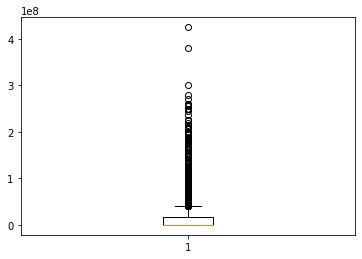

In [21]:
budget_boxplot = plt.boxplot(clean_df['budget'])

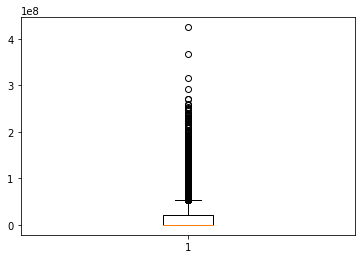

In [22]:
budget_boxplot = plt.boxplot(clean_df['budget_adj'])

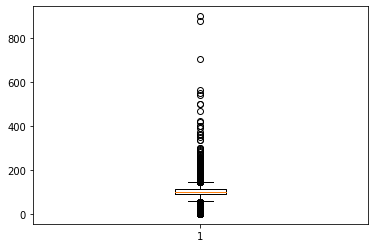

In [23]:
runtime_boxplot = plt.boxplot(clean_df['runtime'])

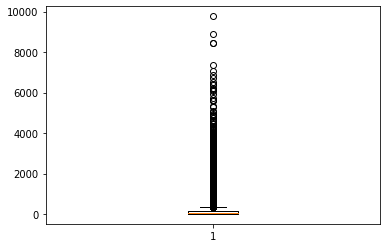

In [24]:
runtime_boxplot = plt.boxplot(clean_df["vote_count"])

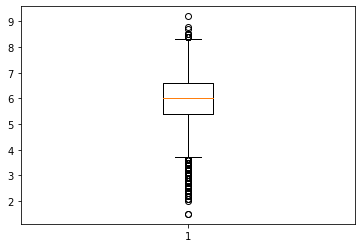

In [25]:
runtime_boxplot = plt.boxplot(clean_df["vote_average"])

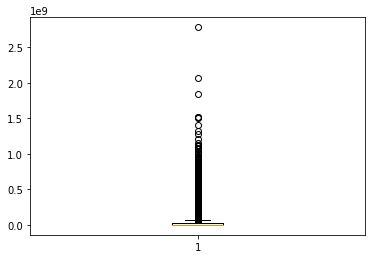

In [26]:
runtime_boxplot = plt.boxplot(clean_df["revenue"])

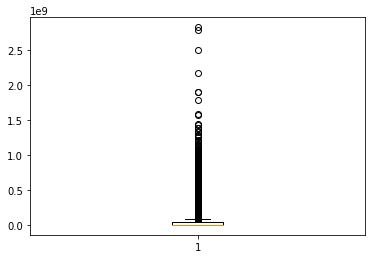

In [27]:
runtime_boxplot = plt.boxplot(clean_df["revenue_adj"])

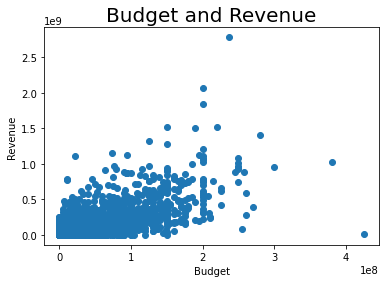

In [28]:
plt.scatter(x=clean_df['budget'], y=clean_df['revenue']);
plt.title('Budget and Revenue',fontsize = 20)
plt.xlabel('Budget',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.show()

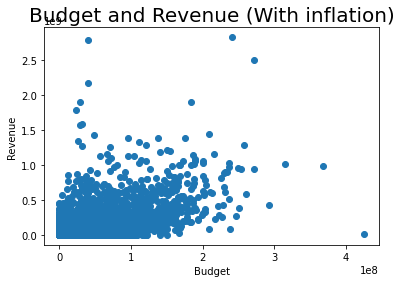

In [29]:
plt.scatter(x=clean_df['budget_adj'], y=clean_df['revenue_adj']);
plt.title('Budget and Revenue (With inflation)',fontsize = 20)
plt.xlabel('Budget',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.show()

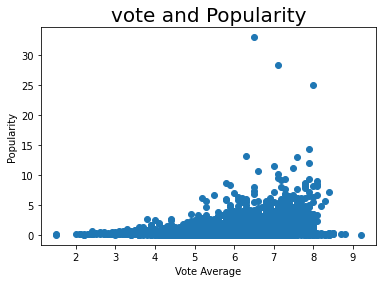

In [30]:
plt.scatter(x=clean_df["vote_average"],y=clean_df["popularity"])
plt.title('vote and Popularity',fontsize = 20)
plt.xlabel('Vote Average',fontsize = 10)
plt.ylabel('Popularity',fontsize = 10)
plt.show()

- Drop outliers (By IQR)

In [31]:
# remove the outliers
def removes_outliers(df):
    threshold=1.5
  # new df
    df_copy = df.copy()

  # iterate through numeric columns and replace outliers
    for i in df_copy.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']):
    # calculate IQR and thresholds
        Q1 = df_copy[i].quantile(0.25)
        Q3 = df_copy[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_threshold = Q1 - threshold * IQR
        upper_threshold = Q3 + threshold * IQR
        # identify outliers and makes it detect zeros 
        outliers = ((df_copy[i] < lower_threshold) | (df_copy[i] > upper_threshold)) | (df_copy[i] == 0)
    
        # Replace outliers with the mean
        df_copy = df_copy.loc[~outliers, :] # by this way i have filterd the outliers and now the nonoutliers is only here
    return df_copy

In [32]:
df = removes_outliers(df)

**- Split genres**

In [33]:
# Split genres into a list using vectorized string splitting
df['genres'] = df['genres'].str.split("|")

In [34]:
# List comprehension to extract genre names
df['genres'] = df['genres'].apply(lambda x: [genre.strip() for genre in x])

---

<a id='eda'></a>
## Exploratory Data Analysis

### Questions to Explore

1. Which genres are most popular from year to year?
2. Are movies released in certain years ("release_year") generally more popular or more profitable?
3. Investigate the correlation between a movie's vote average and its revenue (With inflation). Do movies with higher ratings tend to earn more, or are there other factors at play?
4. Is there a correlation between a movie's budget and its revenue (With inflation)?
5. Is there any particular actor or actress who consistently attracts high popularity or receives a great vote average?

#### Style the visualizations

In [35]:
sns.set(style="whitegrid")

## Analysis and Visualization

### 1 - Which genres are most popular from year to year?

In [36]:
# Extract release year
df['release_year'] = df["release_date"].dt.year

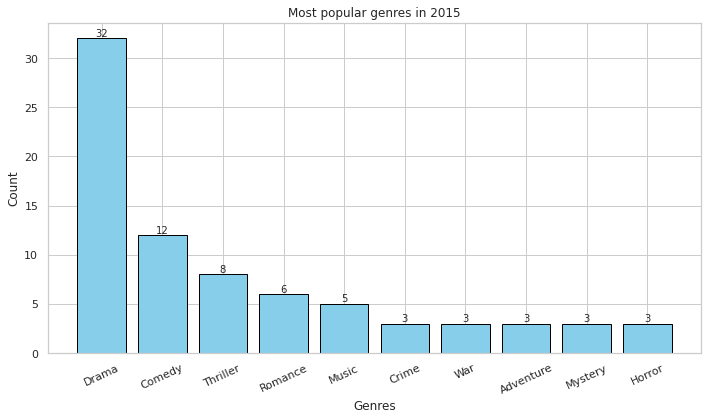

In [37]:
def plot_popular_genres(data, year, top_n=10):
    # check if the provided year is within the range from 1974 to 2015
    if year < 1947 or year > 2015:
        print("Error: Year should be within the range from 1974 to 2015.")
        return
    
    # filter data for the chosen year
    data_year = df[df["release_year"] == year]
    
    # if no data available for the year, print a message and return
    if data_year.empty:
        print(f"No data available for the year {year}.")
        return
    
    # enumrate and flatten genres list for counting
    genres_counts_year = data_year["genres"].explode().value_counts().nlargest(top_n)
    # create a bar plot for visualization
    plt.figure(figsize=(10, 6))
    bars = plt.bar(genres_counts_year.index, genres_counts_year.values, color='skyblue', edgecolor='black')
    plt.title(f"Most popular genres in {year}")
    plt.xlabel("Genres")
    plt.ylabel("Count")
    plt.xticks(rotation = 25)
    # adding data labels
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)
        
    plt.tight_layout()
    plt.show()

plot_popular_genres(df.copy() , 2015) # From 1974 to 2015

- The Drama and comedy are the most popular from 1995 to 2000
- Comedy started to fall out of favor in the 2000s

### 2 - Are movies released in certain years ("release_year") generally more popular or more profitable?

In [38]:
# Filter the data to include only years within the dataset range
valid_years = range(1974, 2015)  # Adjust the range according to your dataset
data_year = df[df['release_year'].isin(valid_years)].groupby('release_year')[['popularity', 'revenue']].mean()

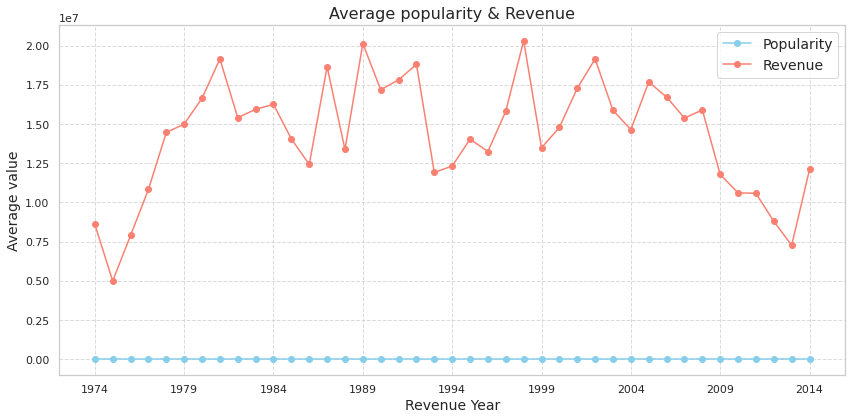

In [39]:
plt.figure(figsize=(12, 6))
# popularity line
plt.plot(data_year.index, data_year['popularity'], marker='o', label='Popularity', color='skyblue')
# revenue line
plt.plot(data_year.index, data_year['revenue'], marker='o', label='Revenue', color='salmon')
# custome the plot
plt.title('Average popularity & Revenue', fontsize=16)
plt.xlabel('Revenue Year', fontsize=14)
plt.ylabel('Average value', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(min(data_year.index), max(data_year.index)+1, 5))  # Adjust x-axis ticks for clarity
plt.tight_layout()
plt.show()

- Popularity and Revenue Fluctuations: Both movie popularity and revenue vary over the years without a clear trend.

- Temporal Patterns: Popularity tends to peak in earlier years (around 1974-1984) and later years (around 2004-2014), while revenue generally increases in later years (around 1994-2014).

### 3 - Investigate the correlation between a movie's vote average and its revenue (With inflation). Do movies with higher ratings tend to earn more, or are there other factors at play?

In [40]:
# invetigate correlation
correlation = df['vote_average'].corr(df['revenue_adj'])

Correlation between vote_average and revenue_adj: 0.10


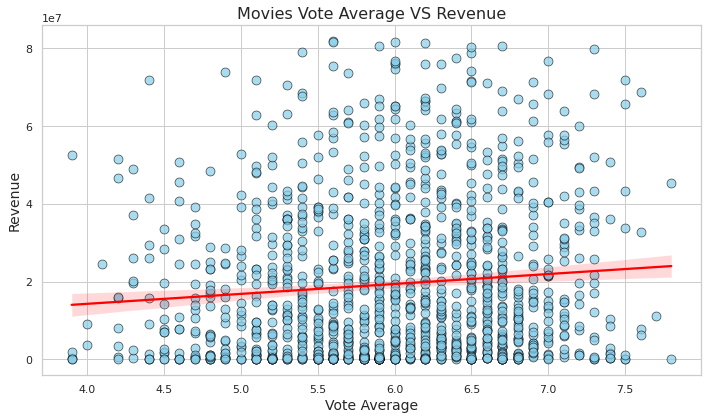

In [41]:
# print correlation coefficient
print(f"Correlation between vote_average and revenue_adj: {correlation:.2f}")

# create a scatter plot for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vote_average', y='revenue_adj', alpha=0.7, s=80, color='skyblue', edgecolor='black')
# add a trend line
sns.regplot(data=df, x='vote_average', y='revenue_adj', scatter=False, color='red')
plt.title('Movies Vote Average VS Revenue', fontsize=16)
plt.xlabel('Vote Average', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

- The scatter plot indicates a weak positive correlation between a movie's vote average and its revenue.
- There is a slight upward trend, but the data points are widely scattered.
- Many movies with high ratings have low revenue, and vice versa.

### 4 - Is there a correlation between a movie's budget and its revenue (With inflation)?

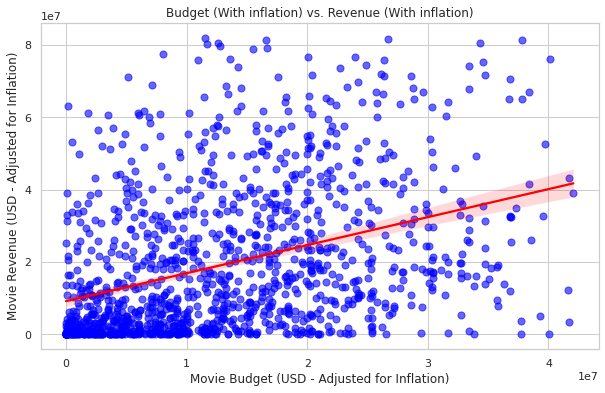

In [42]:
# create a scatter plot for visualization
plt.figure(figsize=(10, 6))
plt.scatter(df["budget_adj"], df["revenue_adj"], alpha=0.6, s=50, color='blue');
# adding a trend line
sns.regplot(data=df, x="budget_adj", y="revenue_adj", scatter=False, color='red')
# labels and title
plt.title("Budget (With inflation) vs. Revenue (With inflation)")
plt.xlabel("Movie Budget (USD - Adjusted for Inflation)")
plt.ylabel("Movie Revenue (USD - Adjusted for Inflation)")
plt.grid(True)
plt.show()

The scatter plot illustrates a positive correlation between a movie's budget and its revenue when adjusted for inflation. This indicates a general upward trend, suggesting that movies with higher budgets tend to yield higher revenues. However, it's essential to acknowledge the presence of significant scatter in the data, signifying numerous exceptions to this trend.

### 5 - Is there any particular actor or actress who consistently attracts high popularity or receives a great vote average?

In [43]:
# split the 'cast' column based on "|" delimiter to extract individual cast members
split_cast = df['cast'].str.split('|', expand=True)

In [44]:
# stack the resulting dataframe to create a series of cast members
stacked_cast = split_cast.stack()

In [45]:
# group the stacked data by cast and calculate the count of occurrences for each cast member
cast_vote_counts = stacked_cast.value_counts()

In [46]:
# identify the most popular cast with the highest total vote count
most_popular_cast = cast_vote_counts.idxmax()

In [47]:
# determine the top 10 most popular casts
top_casts = cast_vote_counts.nlargest(10)

In [48]:
# highlight the most popular cast in red and other casts in violet
highlight_color = ['crimson' if cast == most_popular_cast else 'mediumpurple' for cast in top_casts.index]

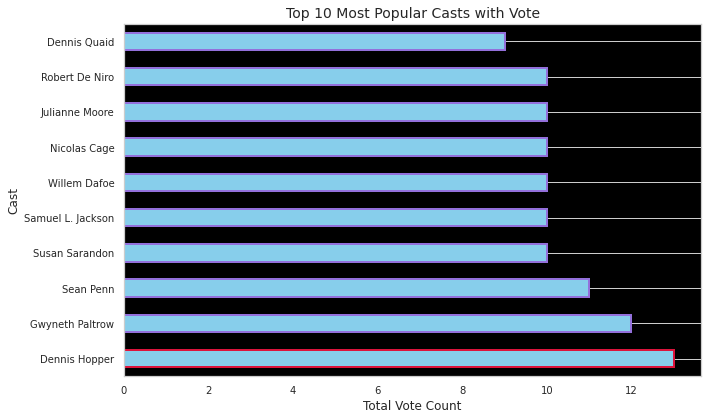

In [49]:
# create a horizontal bar chart to visualize the top 10 most popular casts
plt.figure(figsize=(10, 6))
axis = plt.axes()
top_casts.plot(kind='barh', color='skyblue', edgecolor=highlight_color, linewidth=2, ax=axis)
axis.set_facecolor("black") # background color gray
plt.xlabel('Total Vote Count', fontsize=12)
plt.ylabel('Cast', fontsize=12)
plt.title('Top 10 Most Popular Casts with Vote', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)  # a grid lines for x-axis
plt.tight_layout()
plt.show()

- Dennis Hopper stands out as one of the most renowned and highly voted cast members.

<a id='conclusions'></a>
## Conclusions

#### Question 1
> Throughout the annals of cinematic history, the genres of drama, comedy, and thriller have consistently dominated the top echelons. Notably, from 1995 to 2000, both drama and comedy emerged as paramount favorites among audiences. However, as the new millennium unfurled, comedy gradually waned in prominence. Delving further into the past, between 1974 and 1990, the landscape of film production appeared relatively subdued, lacking any significant prevalence of specific genres. Instead, this period witnessed a diverse array of cinematic offerings, with no fixed patterns discernible in the types of films produced.

#### Question 2
> The analysis suggests that while popularity and revenue fluctuate over time, drawing definitive conclusions about movie success based solely on release year is complex. Factors beyond release year, such as genre, critical reception, and marketing efforts, play significant roles in determining a movie's performance. Further exploration with additional data focusing on specific movies or controlling for influencing factors could provide deeper insights into movie popularity and revenue dynamics

#### Question 3
> The correlation coefficient of 0.051 suggests a very weak relationship between vote average and revenue.
This implies that while there might be a slight tendency for movies with higher ratings to earn more money, numerous other factors significantly influence revenue.  **"Movies with higher ratings tend to earn more money, but many other factors play a significant role"**

#### Question 4
> Despite the noted limitations, the scatter plot suggests a positive relationship between a movie's budget and its revenue when adjusted for inflation. This observation underscores the significance of budget allocation in influencing a movie's financial success. However, to make informed decisions, it's essential to consider additional factors beyond budget alone. An in-depth analysis accounting for various variables would provide a more comprehensive understanding of the dynamics impacting movie revenues.

#### Question 5
> Dennis Hopper stands out as one of the most renowned and highly voted cast members.


## Limitations

> The dataset's reliability may be compromised by mistakes in data entry or recording, resulting in errors or inconsistencies in the variables.

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0